# Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
#### 8. Machine Learning and Deep Learning
#### Docente: Msc. Renzo Claure Aracena.

## Regresion con KNN

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Generadores de datos artificiales
from sklearn.datasets import make_classification, make_blobs #gneradores de muestras de clasificación
from sklearn.datasets import make_regression #generador de muestras de regresion simple
from sklearn.datasets import make_friedman1 #generador de muestras de regresion compleja
from matplotlib.colors import ListedColormap #libreria para crear escalas de colores

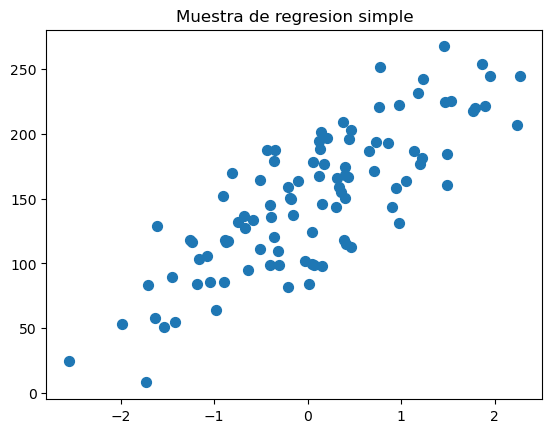

In [3]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Muestra de regresion simple')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [4]:
X_R1.shape

(100, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor 

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

In [6]:
knn_r = KNeighborsRegressor(n_neighbors = 10).fit(X_train, y_train)

#knn_r.fit(X_train, y_train)

print('R-cuadrado entrenamiento: {:.3f}'.format(knn_r.score(X_train, y_train)))
print('R-cuadrado comprobación: {:.3f}'.format(knn_r.score(X_test, y_test)))

R-cuadrado entrenamiento: 0.684
R-cuadrado comprobación: 0.432


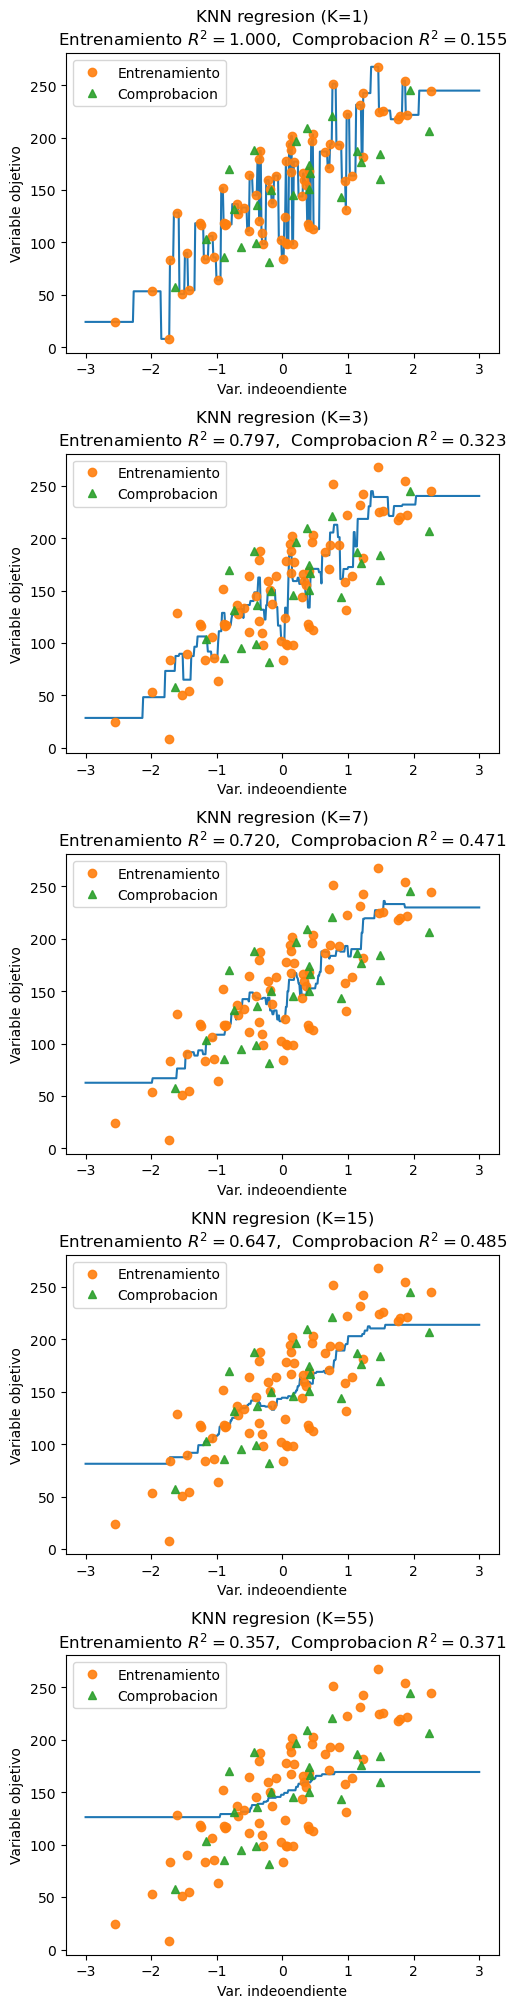

In [7]:
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knn_r = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knn_r.predict(X_predict_input)
    train_score = knn_r.score(X_train, y_train)
    test_score = knn_r.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Entrenamiento')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Comprobacion')
    thisaxis.set_xlabel('Var. indeoendiente')
    thisaxis.set_ylabel('Variable objetivo')
    thisaxis.set_title('KNN regresion (K={})\n\
Entrenamiento $R^2 = {:.3f}$,  Comprobacion $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)